<a href="https://colab.research.google.com/github/Navaneetdatta/CE888-repositor/blob/main/lab%204/My%20recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#load data
user_ratings_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header = None)
print(user_ratings_df)

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]


In [ ]:
#dataset description
user_ratings_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,19.520763,14.107285,11.445280,-1.754815,11.038325,-1.682015,-3.072122,-1.103119,-0.619151,0.174010,-0.921997,2.336112,14.812794,19.702896,35.003861,16.831144,6.108754,3.492787,5.393417,3.160797,27.448552,3.465963,3.290261,31.892051,14.294251,3.125464,3.381442,31.184107,9.610589,8.527044,...,3.147019,3.156669,19.295580,30.078602,3.261098,2.773196,29.075706,2.804985,2.818099,19.205059,64.955502,65.511747,65.230747,63.738037,64.060745,64.784238,63.813772,63.885116,63.075803,63.645943,63.130073,63.174054,62.956359,62.417244,62.222051,61.607885,62.263703,61.753387,62.469264,60.689216,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,38.329975,32.641415,29.938683,5.155992,29.526365,5.355089,5.281486,4.532969,5.039152,5.083095,5.216848,6.856606,34.587240,39.682897,48.637167,37.051743,21.688893,7.074558,19.659326,6.401350,44.864605,12.037673,5.717119,47.440118,34.057662,5.703922,4.991137,47.176688,27.673845,26.397293,...,9.383020,6.160750,39.238572,46.233500,10.976394,6.659336,45.963476,6.105714,6.822990,38.955997,47.396153,45.921201,46.644798,48.075806,47.520009,46.243016,47.220253,46.804611,47.675717,47.133626,47.002169,47.332326,46.966353,47.621754,47.593983,47.967071,47.183236,47.224021,46.479714,48.088127,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,-0.830000,-0.530000,-1.020000,-6.260000,-1.410000,-6.210000,-7.430000,-4.420000,-4.420000,-3.450000,-5.050000,-0.730000,-1.840000,-2.480000,-3.690000,-2.280000,-1.500000,0.730000,-1.410000,0.340000,-2.380000,-0.580000,0.680000,-3

In [ ]:
#checking for nan values
user_ratings_df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
96     0
97     0
98     0
99     0
100    0
Length: 101, dtype: int64

In [ ]:
#replacing empty values with NaN which will be our test set
user_ratings_df = user_ratings_df.replace(99.00, np.NaN)

In [ ]:
#drop column that does not contain ratings(number of jokes rated by each user)
user_ratings_df = user_ratings_df.drop(columns = [0])

In [ ]:
user_ratings_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [ ]:
#size of the dataset
user_ratings_df.shape

(24983, 100)

In [ ]:
#using pandas to find the best and worst rated jokes
# for column in df:
#  mean(column) 
mean = user_ratings_df.mean(axis=0)
mean.max()

3.6650848950824937

In [ ]:
mean

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [ ]:
arr = user_ratings_df.values
print(arr.shape)

(24983, 100)


In [ ]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

In [ ]:
arr[idx[0][0], idx[1][0]]

3.98

In [ ]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [ ]:
n_latent_factors = 2

user_ratings = arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [ ]:
latent_item_features

array([[0.06945268, 0.27997195],
       [0.02209214, 0.75243475],
       [0.07992493, 0.06329488],
       [0.48465438, 0.36498428],
       [0.34922411, 0.83691749],
       [0.01802532, 0.07465063],
       [0.99942166, 0.70236329],
       [0.66394113, 0.51085061],
       [0.37114779, 0.81749007],
       [0.88078503, 0.43354612],
       [0.17171108, 0.97346877],
       [0.71138122, 0.60443271],
       [0.474135  , 0.02138941],
       [0.90637843, 0.52820964],
       [0.64851342, 0.23688677],
       [0.53767385, 0.248321  ],
       [0.42840003, 0.21813797],
       [0.91650203, 0.31528983],
       [0.64263544, 0.46970052],
       [0.20739893, 0.90932647],
       [0.95018845, 0.97085012],
       [0.46270209, 0.49400188],
       [0.1098946 , 0.05788657],
       [0.46386694, 0.69214051],
       [0.23544822, 0.76273257],
       [0.66303646, 0.21863508],
       [0.23819445, 0.2919651 ],
       [0.7636956 , 0.1841556 ],
       [0.86930973, 0.10917023],
       [0.20996549, 0.17283228],
       [0.

In [ ]:
latent_user_preferences

array([[0.64080373, 0.33657698],
       [0.61678664, 0.02078415],
       [0.86470356, 0.73359391],
       ...,
       [0.73851586, 0.51015169],
       [0.31832526, 0.09741583],
       [0.63363047, 0.12810953]])

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating!=99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=26.111472
Iteration 10/100:	MSE=23.080254
Iteration 20/100:	MSE=21.303247
Iteration 30/100:	MSE=20.404634
Iteration 40/100:	MSE=18.957867
Iteration 50/100:	MSE=17.466564
Iteration 60/100:	MSE=17.212005
Iteration 70/100:	MSE=17.154731
Iteration 80/100:	MSE=17.137364
Iteration 90/100:	MSE=17.131761


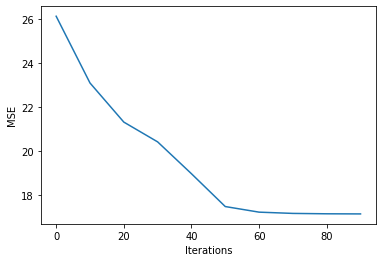

In [ ]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.90547237, -4.19878492, -5.64478975, ..., -2.48642979,
        -6.20252243, -2.59170427],
       [ 2.98313869,  3.16232963,  3.79069889, ...,  2.52668856,
         3.9539476 ,  2.76381272],
       [ 6.84482522,  7.1472458 ,  7.43473366, ...,  7.31866245,
         7.17228146,  8.24266142],
       ...,
       [-0.86723531, -0.92743585, -1.19617922, ..., -0.6211171 ,
        -1.29113627, -0.66172432],
       [-1.73966789, -1.88344229, -2.66683862, ..., -0.92401568,
        -2.9921429 , -0.92506755],
       [ 2.77981745,  2.85882518,  2.51048412, ...,  3.58516163,
         2.14722527,  4.11349218]])

In [ ]:
values = [zip(arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = user_ratings_df.columns

In [ ]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.9054723712551023)","(8.79, -4.1987849206037)","(-9.66, -5.644789751555328)","(-8.16, -9.558572852132706)","(-7.52, -2.7276087578301342)","(-8.5, -1.7802122747125515)","(-9.85, -4.971979164002411)","(4.17, -4.347066507535371)","(-8.98, -8.827241078120695)","(-4.76, -3.717160339984349)","(-8.5, -1.627111511366456)","(-6.75, -1.7682937676316448)","(-7.18, -6.556758548194105)","(8.45, -1.6035931041165852)","(-7.18, -6.600371226034844)","(-7.52, -10.082097264300328)","(-7.43, -4.513956713468681)","(-9.81, -5.331002930505436)","(-9.85, -3.873528826104917)","(-9.85, -6.176044807495617)","(-9.37, 0.3622322329563506)","(1.5, -4.334359444059766)","(-4.37, -6.1206506647181635)","(-9.81, -10.56000446447252)","(-8.5, -4.680884826738531)","(1.12, -1.6174124626287993)","(7.82, 3.4218147305302455)","(2.86, -1.7171947686314015)","(9.13, 3.4912670447256926)","(-7.43, -7.935247667891193)","(2.14, 1.0934974677877811)","(-4.08, 3.2295476906480562)","(-9.08, -9.440079799023744)","(7.82, -2.7405868115980017)","(5.05, 2.848941286738467)","(4.95, 3.6912714574367675)","(-9.17, -9.13928376720168)","(-8.4, -3.472854071411963)","(-8.4, -2.566468035089418)","(-8.4, -3.7098614915929917)",...,"(8.59, 1.2059998009788284)","(3.59, 2.109691927012169)","(-6.84, -5.415040653076429)","(-9.03, -8.32534091842676)","(2.82, 1.3212135211225269)","(-1.36, 1.5147488897497645)","(-9.08, -8.811227271456678)","(8.3, 1.7438441544510002)","(5.68, 1.7517129603505297)","(-4.81, -4.701118308911518)","(nan, -6.794874543677645)","(nan, 1.1396149890136194)","(nan, -3.4139651556715904)","(nan, -9.241962116478883)","(nan, -6.080848901838265)","(nan, 0.538644036238732)","(nan, -4.250447936221122)","(-9.42, -2.2884664099179033)","(nan, -5.403226485644093)","(nan, -2.739936860798441)","(nan, -1.3605178139590242)","(-7.72, -4.640313036463465)","(nan, -0.37996809325839576)","(nan, -4.825910228421715)","(nan, -4.182753281929746)","(nan, -6.2483697970894125)","(nan, -1.1390546920764693)","(nan, -1.2632818219856683)","(nan, 3.190242470840018)","(nan, -5.313728726354586)","(2.82, -1.4845974759127694)","(nan, -3.1955479046345836)","(nan, 0.22911479781531502)","(nan, -4.7083245969642515)","(nan, -3.937093272695117)","(nan, -2.867982883571843)","(-5.63, -2.167842264422138)","(nan, -2.486429788316661)","(nan, -6.202522431410261)","(nan, -2.591704267126256)"
1,"(4.08, 2.983138690977167)","(-0.29, 3.162329626836535)","(6.36, 3.7906988854923886)","(4.37, 5.271132392510761)","(-2.38, 2.2359195676177075)","(-9.66, 2.5268588910138963)","(-0.73, 2.996756765149627)","(-5.34, 2.338821541074684)","(8.88, 5.06441673434017)","(9.22, 2.9898948803267116)","(6.75, 2.4062149004502267)","(8.64, 2.5817990854869004)","(4.42, 3.174124357698298)","(7.43, 2.501081498288846)","(4.56, 3.038137724546472)","(-0.97, 4.3491737902539365)","(4.66, 2.4827637498936697)","(-0.68, 2.9666912717784184)","(3.3, 2.7489185610455027)","(-1.21, 3.6074930462883374)","(0.87, 1.655607326635601)","(8.64, 3.503244780284588)","(8.35, 4.029791660573057)","(9.17, 5.509860270695384)","(0.05, 3.5596631147657747)","(7.57, 2.456219387150285)","(4.71, 0.24713300162398608)","(0.87, 2.414731451003928)","(-0.39, 0.12770796785924185)","(6.99, 4.872519406378482)","(6.5, 1.2666071536574974)","(-0.92, 0.33550645913025623)","(7.14, 5.213422798704543)","(9.03, 2.797266249543064)","(-1.8, 0.5325251476351474)","(0.73, 0.04886442352345345)","(7.09, 4.857039960191911)","(3.4, 3.0731028529507887)","(-0.87, 2.8213536064427314)","(7.91, 3.238973266716223)",...,"(-6.7, 1.3129041851179841)","(-3.35, 0.8904567658469877)","(-9.03, 3.7950840534886114)","(4.47, 4.719351626106094)","(4.08, 1.172485844913827)","(-3.83, 1.0861260735757867)","(8.74, 4.955364612309497)","(1.12, 0.9522352774252176)","(0.78, 1.0257981879160016)","(